### Такс, давайте сначала посмотрим на наши данные (вдруг их сгенерировали random.random)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

<Axes: xlabel='amount'>

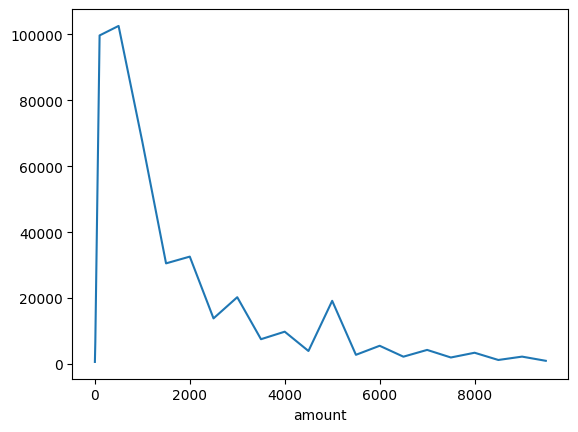

In [2]:
df = pd.read_csv('500kfinDS.csv')
a = (df.groupby('amount')['amount'].count())
a[a.index<10000].plot()

<Axes: xlabel='amount'>

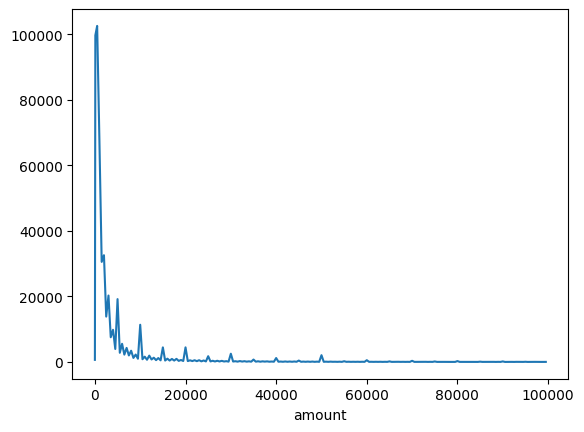

In [74]:
a[a.index<100000].plot()

Ну вроде как заметны довольно ожидаемые всплески на "круглых" значениях

2020-09-25 2021-03-23


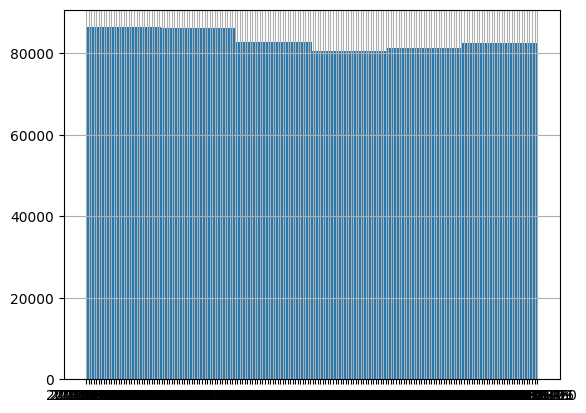

In [85]:
 df.date.hist(bins=6)
 print( df.date.min(), df.date.max())

Что касается распределения по датам, видим что всё довольно стабильно и просадка к январю идёт

Давайте попробуем почистить от шума по сумме транзакции

In [7]:
df_1 = df.iloc[:10000,-2:-1]
dbscan = DBSCAN(eps=5, 
                  min_samples=10,
                  metric='euclidean',
                  algorithm='kd_tree',
                  )
labels = dbscan.fit_predict(df_1)

df_1['Cluster'] = labels
df_1.groupby('Cluster').count()

,amount
Cluster,
-1,269
0,2049
1,655
2,1911
3,1405
4,584
5,245
6,401
7,135


<Axes: >

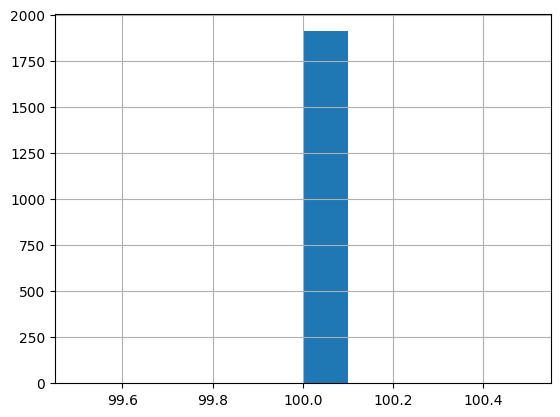

In [28]:
df_1.amount[df_1.Cluster == 2].hist()